<a href="https://colab.research.google.com/github/therobinkay/gender_bias_2021/blob/main/Journal_Analysis_Supplementary_(GitHub).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import all necessary packages

import io
import pandas as pd
import os
import itertools
import numpy as np
import scipy.stats
import time

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

import math

from collections import defaultdict
from itertools import combinations as comb

import networkx as nx
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
!cd "drive/My Drive"

In [4]:
# read all necessary .csv files

data = pd.read_csv("drive/My Drive/codes/data.csv")
dp = pd.read_csv("drive/My Drive/codes/doipacs.csv")
cen = pd.read_csv('drive/My Drive/codes/cen.csv')

cdata = pd.read_csv('drive/My Drive/codes/cdata.csv')

cb = pd.read_csv("drive/My Drive/codes/citationBara.csv")
# extra modification for future analyses
cb['pair'] = "(" + cb["citing_doi"] + ", " + cb["cited_doi"] + ")"
cb['pair2'] = "(" + cb["cited_doi"] + ", " + cb["citing_doi"] + ")"

rhom = pd.read_csv("drive/My Drive/codes/rhom.csv")

In [17]:
############## SELECT DESIRED PACS (HOMOPHILY ONLY) ###############

homn = pd.read_csv("drive/My Drive/codes/hom0.csv")
# homn = pd.read_csv("drive/My Drive/codes/hom1.csv")
# homn = pd.read_csv("drive/My Drive/codes/hom2.csv")
# homn = pd.read_csv("drive/My Drive/codes/hom3.csv")
# homn = pd.read_csv("drive/My Drive/codes/hom4.csv")
# homn = pd.read_csv("drive/My Drive/codes/hom5.csv")
# homn = pd.read_csv("drive/My Drive/codes/hom6.csv")
# homn = pd.read_csv("drive/My Drive/codes/hom7.csv")
# homn = pd.read_csv("drive/My Drive/codes/hom8.csv")
# homn = pd.read_csv("drive/My Drive/codes/hom9.csv")

print(len(homn))
homn.head()

1189255


,paper1,gender1,year1,paper2,gender2,year2,qval,k
0,10.1103/PhysRevA.30.336,male,1984,10.1103/PhysRevA.34.1617,male,1986,0.001230,False
1,10.1103/PhysRevA.30.336,male,1984,10.1103/PhysRevA.34.4472,female,1986,0.017857,False
2,10.1103/PhysRevA.30.336,male,1984,10.1103/PhysRevA.41.784,male,1990,0.017857,False
3,10.1103/PhysRevA.34.4472,female,1986,10.1103/PhysRevA.41.784,male,1990,0.017857,False
4,10.1103/PhysRevA.36.4950,female,1987,10.1103/PhysRevA.41.784,male,1990,0.006410,False


## Missing Links

In [18]:
# evaluate similar pairs by different p*
# evaluate the citation relationship within pairs

homn_qval = np.array(homn['qval'])

plist = np.unique(homn_qval)
klist = []
mlist = []

for pstar in tqdm(plist):
    result = homn_qval < pstar
    sim = homn[result]
    mlist.append(len(sim))
    klist.append(sum(sim["k"]))

100%|██████████| 794/794 [00:34<00:00, 22.86it/s]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


(0.15, 0.65)

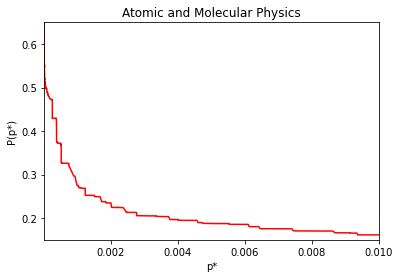

In [19]:
# create a P(p*) plot - manual PACS modification required

y_low = 0.15
y_high = 0.65
title = 'Atomic and Molecular Physics' 

plt.figure(1)
plt.plot(plist, np.array(klist)/np.array(mlist), color ='red')

plt.title(title)
plt.xlabel("p*")
plt.xlim(0.0000001,0.01)
plt.ylabel("P(p*)")
plt.ylim(ymin=y_low, ymax=y_high)

## Toy Example

In [20]:
# Reproduction of the toy example listed in the supplementary materials

# find several papers with high relations to each other

otoy = pd.DataFrame([['10.1103/PhysRevA.49.1637'],
  ['10.1103/PhysRevA.33.3706'],
  ['10.1103/PhysRevA.71.032514'],
  ['10.1103/PhysRevA.73.022503'],
  ['10.1103/PhysRevA.70.032502'],
  ['10.1103/PhysRevA.77.032511'],
  ['10.1103/PhysRevLett.99.240402'],
  ['10.1103/PhysRevA.72.062502'],
  ['10.1103/PhysRevLett.95.050407'],
  ['10.1103/PhysRevLett.101.240406'],
  ['10.1103/PhysRevA.53.168'],
  ['10.1103/PhysRevA.77.044501'],
  ['10.1103/PhysRevE.53.4236'],
  ['10.1103/PhysRevD.64.036007'],
  ['10.1103/PhysRevA.56.139'],
  ['10.1103/PhysRevD.76.125028'],
  ['10.1103/PhysRevD.63.056002'],
  ['10.1103/PhysRevLett.64.2733'],
  ['10.1103/PhysRevD.50.5443'],
  ['10.1103/PhysRevD.45.1233'],
  ['10.1103/PhysRevA.54.3790'],
  ['10.1103/PhysRevD.46.1088'],
  ['10.1103/PhysRevA.51.4419'],
  ['10.1103/PhysRevA.60.5091'],
  ['10.1103/PhysRevD.46.5177'],
  ['10.1103/PhysRevA.44.4728'],
  ['10.1103/PhysRevE.71.026705'],
  ['10.1103/PhysRevD.50.4611'],
  ['10.1103/PhysRevE.75.026705'],
  ['10.1103/PhysRevE.64.016703'],
  ['10.1103/PhysRevD.79.114007'],
  ['10.1103/PhysRevE.59.1207'],
  ['10.1103/PhysRevD.79.094020']], columns=['doi'])

In [21]:
# Assign code number to the pairs

otoy_test = otoy.merge(rhom, left_on='doi', right_on='paper',
                       how='inner').drop(['doi'], axis=1)
print(len(otoy_test))

code = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N",
        "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "AA", "AB",
        "AC", "AD", "AE", "AF"]

otoy_test = otoy_test.sort_values('year')
otoy_test['code'] = code

32


In [22]:
# Create a Master DataFrame for the toy example (doi, gender, year, code)

cb = cb[['citing_doi', 'cited_doi']]
toytest = pd.merge(otoy_test, cb, left_on='paper', right_on='citing_doi',
                   how='left').drop(['citing_doi'], axis=1)
toytest.columns = ['paper', 'pgender', 'pyear', 'pcode', 'cited_doi']
toytest = toytest.merge(rhom, left_on='cited_doi', right_on='paper',
                        how='inner').drop(['cited_doi'], axis=1)
toytest.columns = ['paper', 'pgender', 'pyear', 'pcode', 'reference', 'rgender',
                   'ryear']
toytest = toytest.merge(otoy_test, left_on='reference', right_on='paper',
                        how='inner').drop(['paper_y', 'gender', 'year'], axis=1)
toytest.columns = ['paper', 'pgender', 'pyear', 'pcode', 'reference', 'rgender',
                   'ryear', 'rcode']

toytest = toytest[toytest['reference'].isin(otoy_test.paper)]

toytest['count'] = toytest.groupby('reference')['reference'].transform('count')
toytest.sort_values("count", axis = 0, ascending = True, inplace = True,
                    na_position ='first')

In [23]:
# Calculate the frequency of the appearance of the reference for similarity

cb = cb[['citing_doi', 'cited_doi']]
toy = pd.merge(otoy, cb, left_on='doi', right_on='citing_doi',
               how='left').drop(['citing_doi'], axis=1)
toy.columns = ['paper', 'reference']
toy = toy[toy['reference'].isin(otoy.doi)]

toy['count'] = toy.groupby('reference')['reference'].transform('count')
toy.sort_values("count", axis = 0, ascending = True, inplace = True,
                na_position ='first')

In [24]:
# Run the exactly identical similarity algorithm introduced earlier

toy_s={key:toy[toy['count']==key] for key in toy['count'].unique()}

toyy = {}
tunique_list = {}
for key, sub_toy_s in toy_s.items():
  cbt = sub_toy_s
  from_doi = cbt["paper"]
  to_doi = cbt["reference"]

  tunique_list[key] = len(to_doi.unique())

  parent = {}
  for ref in to_doi.unique():
    parent[ref] = []
  for a, b in zip(from_doi, to_doi):
    parent[b].append(a)

  pair_count = {}
  for l in parent.values():
    for tp in comb(sorted(l), 2):
      if tp in pair_count:
        pair_count[tp] += 1
      else:
        pair_count[tp] = 1
  dfc = []
  for p, value in pair_count.items():
    dfc.append([p[0], p[1], value])
  dfc = pd.DataFrame(dfc, columns=['paper1', 'paper2', 'common'])
  toyy[key] = dfc

freq = {}

for key, tables in toyy.items():
  ftable = toy_s[key].groupby(["paper"]).size().reset_index(name='frequency')
  freq[key] = ftable

fin = {}
for key, tables in toyy.items():
  if len(tables) > 0:
    tcount = freq[key]
    final_table = tables.merge(tcount, left_on='paper1', right_on='paper')
    final_table = final_table.merge(tcount, left_on='paper2', right_on='paper')
    final_table = final_table.drop(['paper_x', 'paper_y'], axis=1)
    
    fin[key] = final_table

H_func = scipy.stats.hypergeom.pmf

for key, table in fin.items():
  qval = []
  _dp = {}
  nbk = tunique_list[key]

  for i, r in table.iterrows():
    Hs = []
    di, dj = r['frequency_x'], r['frequency_y']
    nijk = r['common']

    for X in range(nijk):
      _ref = (X, nbk, di, dj)
      if _ref in _dp:
        H = _dp[_ref]
      else:
        H = H_func(X, nbk, di, dj)
        _dp[_ref] = H
      Hs.append(H)

    qval.append(1-sum(Hs))

  fin[key]['qval'] = qval

df = pd.concat(fin.values())
df.groupby(['paper1', 'paper2']).size()
df = df.sort_values(['paper1', 'paper2'])

dff = df.drop(["common", "frequency_x", "frequency_y"],
              axis=1).sort_values(["paper1", "paper2",
                                   "qval"]).reset_index(drop=True)
dff_min = dff.groupby(["paper1", "paper2"], as_index=False).min()
dff_min_qval = np.array(dff_min['qval'])

cb['pair'] = "(" + cb["citing_doi"] + ", " + cb["cited_doi"] + ")"
cb['pair2'] = "(" + cb["cited_doi"] + ", " + cb["citing_doi"] + ")"

pairs = "(" + dff_min["paper1"] + ", " + dff_min["paper2"] + ")"
dff_min['k'] = pairs.isin(cb.pair) | pairs.isin(cb.pair2)

dff_min = dff_min.merge(rhom, left_on='paper1', right_on='paper', how='inner')
dff_min = dff_min.drop(['paper'], axis=1)
dff_min = dff_min.rename({'gender': 'gender1', 'year': 'year1'}, axis=1)

dff_min = dff_min.merge(rhom, left_on='paper2', right_on='paper', how='inner')
dff_min = dff_min.drop(['paper'], axis=1)
dff_min = dff_min.rename({'gender': 'gender2', 'year': 'year2'}, axis=1)

cols = ['paper1', 'gender1', 'year1', 'paper2', 'gender2', 'year2', 'qval', 'k']

dff_min = dff_min.reindex(columns=cols)

df_test = dff_min.merge(otoy_test, left_on = 'paper1', right_on = 'paper',
                        how='inner').drop(['paper', 'gender', 'year'], axis=1)
df_test.columns = ['paper1', 'gender1', 'year1', 'paper2', 'gender2', 'year2',
                   'qval', 'k', 'code1']

df_test = df_test.merge(otoy_test, left_on = 'paper2', right_on = 'paper',
                        how='inner').drop(['paper', 'gender', 'year'], axis=1)
df_test.columns = ['paper1', 'gender1', 'year1', 'paper2', 'gender2', 'year2',
                   'qval', 'k', 'code1', 'code2']

In [25]:
homn = dff_min

homn_qval = np.array(homn['qval'])

plist = np.unique(homn_qval)
klist = []
mlist = []

for pstar in tqdm(plist):
    result = homn_qval < pstar
    sim = homn[result]
    mlist.append(len(sim))
    klist.append(sum(sim["k"]))

100%|██████████| 7/7 [00:00<00:00, 405.12it/s]


Text(0, 0.5, 'count')

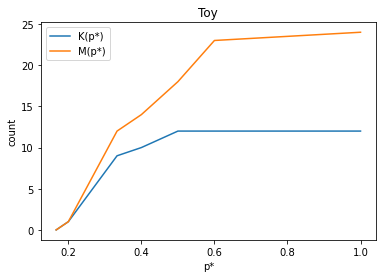

In [26]:
# Find K(p*) and M(p*)

plt.plot(plist, klist)
plt.plot(plist, mlist)

plt.title('Toy')
plt.legend(['K(p*)', 'M(p*)'], loc='upper left')
plt.xlabel("p*")
# plt.xlim(0,0.01)
plt.ylabel("count")
# plt.ylim(0,1500)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'P(p*)')

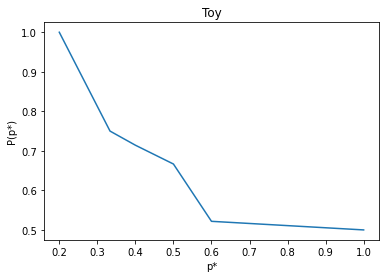

In [27]:
# Find P(p*)

plt.plot(plist, np.array(klist)/np.array(mlist))

plt.title('Toy')
# plt.legend(['total', 'paired'], loc='upper right')
plt.xlabel("p*")
# plt.xlim(0.2,0.4)
plt.ylabel("P(p*)")
# plt.ylim(ymin=0, ymax=0.0002)

## Pairwise Count (Future Works)

In [ ]:
# Create a DataFrame: citing_doi, citing_year, cited_doi

## NOTE THAT: citing_year is not used in this paper but is extracted anyway
##            for convenience, in case future projects want to apply restriction
##            on publication year

dc = data[["doi", "year"]].drop_duplicates(subset = 'doi')
dc = dc.merge(cb, left_on = 'doi', right_on = 'citing_doi', how = 'inner')
dc = dc.drop(['doi'], axis=1)
dc = dc.rename({'year': 'citing_year'}, axis=1)

cols = ['citing_doi', 'citing_year', 'cited_doi']
dc = dc.reindex(columns=cols).sort_values('cited_doi')

In [ ]:
# Observe pairs with different primary author gender

hom_mf = homn[homn["gender1"] != homn["gender2"]].reset_index(drop=True)

test = hom_mf.merge(dc, left_on = 'paper1', right_on = 'cited_doi',
                    how = 'left')
test = test.drop(["cited_doi", "citing_year"], axis=1).drop_duplicates(
    subset=['paper1', 'citing_doi'])
test['count'] = test.groupby(['paper1'])['paper1'].transform('count')
test = test.drop(["citing_doi"], axis=1)
test = test.rename({'count': 'count1'}, axis=1)

test = test.drop_duplicates(subset=['paper1', 'paper2']).drop(
    ['gender1', 'year1', 'paper2', 'gender2', 'year2', 'qval', 'k'], axis=1)
hom_mf = hom_mf.merge(test, on='paper1', how='inner')

test = hom_mf.merge(dc, left_on = 'paper2',
                    right_on = 'cited_doi', how = 'left')
test = test.drop(["cited_doi", "citing_year"], axis=1).drop_duplicates(
    subset=['paper2', 'citing_doi'])
test['count'] = test.groupby(['paper2'])['paper2'].transform('count')
test = test.drop(["citing_doi"], axis=1)
test = test.rename({'count': 'count2'}, axis=1)

test = test.drop_duplicates(subset=['paper1', 'paper2']).drop(
    ['gender1', 'year1', 'paper1', 'gender2', 'count1', 'year2',
     'qval', 'k'], axis=1)
hom_mf = hom_mf.merge(test, on='paper2', how='inner')

In [ ]:
# Calculate c_d (male citation count - female citation count)

listd = []

for c in range(len(hom_mf)):
  if hom_mf['gender1'][c] == 'male':
    listd.append(hom_mf['count1'][c] - hom_mf['count2'][c])
  else:
    listd.append(hom_mf['count2'][c] - hom_mf['count1'][c])

hom_mf['countd'] = listd

In [ ]:
# Extract subDataFrame with q-value less than p threshold

p = 0.002 # Select p thresholds with listed numbers in the paper

homp = hom_mf[hom_mf['qval'] < p].sort_values('countd').reset_index(drop=True)

mlist = []
fmlist = []

for i in range(len(homp)):
  if homp['gender1'][i] == 'male':
    mlist.append(homp['count1'][i])
    fmlist.append(homp['count2'][i])
  else:
    mlist.append(homp['count2'][i])
    fmlist.append(homp['count1'][i])

# Find the standard deviation
sd = math.sqrt((np.std(mlist) ** 2 + np.std(fmlist) ** 2)/len(homp))

# Find z-scores (for p-values)
print((np.mean(mlist)-np.mean(fmlist))/sd)